## 读取客户流失数据

In [1]:
import pandas
df = pandas.read_csv('../data/customer_churn.csv', index_col=0, header = 0)

## 数据前处理

In [3]:
df = df.iloc[:,3:]

In [4]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

In [5]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

## 区分训练与测试数据集

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

## 尺度标准化

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## 训练ANN

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [25]:
def tarinProcess(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = classifier.fit(x_train, y_train,
                        batch_size=10,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))
    return history

In [26]:
history1 = tarinProcess('sgd')

In [27]:
history2 = tarinProcess('RMSprop')

In [36]:
history3 = tarinProcess('Adagrad')

In [29]:
history4 = tarinProcess('Adadelta')

In [32]:
history5 = tarinProcess('Adam')

## 评估优化器

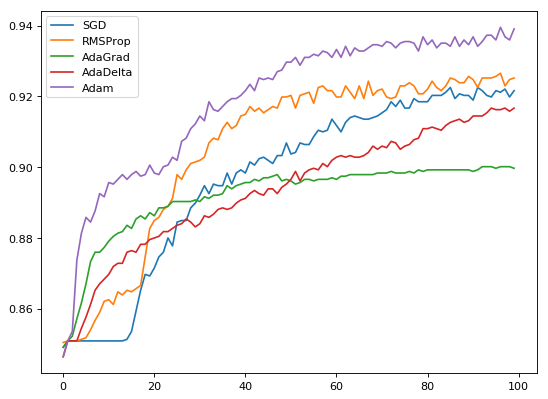

In [40]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history['acc'], label='SGD')
plt.plot(history2.epoch, history2.history['acc'], label='RMSProp')
plt.plot(history3.epoch, history3.history['acc'], label='AdaGrad')
plt.plot(history4.epoch, history4.history['acc'], label='AdaDelta')
plt.plot(history5.epoch, history5.history['acc'], label='Adam')
plt.legend()
plt.show()